# Report - Correlation Analysis of Health Datasets

### Faraz Mazhar
### 10th january 2023

### Preparation

#### Install Dependencies

In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install os
%pip install sqlalchemy


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import Modules

In [2]:
import pandas as pd
import os
import subprocess
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Load Data

In [3]:
# If database doesn't exist, run pipeline to create it
if not os.path.exists("../data/data.sqlite"):
    subprocess.run(["python3", "../pipeline.py"])

# Load data from database
con = create_engine('sqlite:///../data/correlation-analysis-of-health-datasets.sqlite')
ckd_df = pd.read_sql_table('CKD_data', con)
hepatitis_c_df = pd.read_sql_table('hepatitis_data', con)
arterial_disease_ibd_df = pd.read_sql_table('arterial_disease_data', con)

# Introduction

## Motivation

In the dynamic landscape of healthcare, the integration of diverse datasets is a critical step towards unlocking invaluable insights that can shape the future of medical research and patient care. This project is fueled by the inherent need to bridge the gaps between disparate medical datasets, specifically focusing on Chronic Kidney Disease (CKD), Hepatitis C, and Arterial Disease with Inflammatory Bowel Disease (IBD) datasets.

The central motivation behind this project stems from the quest to uncover hidden correlations and patterns among seemingly unrelated health conditions. By amalgamating information from varied sources, we aim to unravel the complex interplay between different health factors, contributing to a more comprehensive understanding of health dynamics.

**Key Motivations:**

1. **Holistic Health Understanding:**
   Health conditions rarely exist in isolation; they are often interconnected. By integrating datasets from diverse regions, this project seeks to offer a more holistic understanding of health patterns and interdependencies, transcending geographical boundaries to explore potential global health trends.

2. **Personalized Treatment Approaches:**
   Unveiling correlations and common risk factors can open avenues for personalized treatment approaches. This project aspires to identify patterns that may guide tailored interventions, recognizing the individuality of patients and fostering more effective and targeted healthcare strategies.

3. **Global Health Implications:**
   By studying datasets from different regions, the project aims to identify regional variations and commonalities in health trends. This information holds the potential to address global health challenges, inform public health strategies, and foster collaborative efforts between healthcare systems worldwide.

4. **Advancement of Data Engineering Methods:**
   Beyond its specific health implications, this project contributes to the advancement of data engineering methods in healthcare. Tackling the challenges of integrating diverse medical datasets showcases the potential of robust methodologies, offering insights that can guide similar initiatives in the evolving landscape of health data analytics.

## Goal

This project aims to integrate and analyze disparate medical datasets focused on Chronic Kidney Disease (CKD), Hepatitis C, and Arterial Disease with Inflammatory Bowel Disease (IBD). By harmonizing information from Japan, Abu Dhabi, and France, the primary goal is to uncover correlations and patterns, providing a deeper understanding of the relationships between these health conditions.

The project strives for seamless dataset integration, correlation discovery, and a contribution to precision medicine by tailoring interventions based on observed patterns. Insights from diverse regions aim to inform global health strategies and address regional health variations. The anticipated outcomes include a comprehensive understanding of CKD, Hepatitis C, and Arterial Disease with IBD, impacting evidence-based healthcare decision-making and advancing data engineering methodologies in healthcare. Ultimately, the project aims to guide research, foster collaboration, and enhance patient outcomes globally through data-driven insights.

## Datasources

Here a short listing of the used datasources

1. **Chronic Kidney Disease (CKD) EHRs Abu Dhabi**
* Data URL: https://www.kaggle.com/datasets/davidechicco/chronic-kidney-disease-ehrs-abu-dhabi?select=ChronicKidneyDisease_EHRs_from_AbuDhabi.csv
* Electronic Health Records (EHRs) containing information on patients with Chronic Kidney Disease in Abu Dhabi.

2. **Hepatitis C EHRs Japan**
* Data URL: https://www.kaggle.com/datasets/davidechicco/hepatitis-c-ehrs-from-japan?select=hepatitis_C_EHRs_Japan.csv
* Electronic Health Records (EHRs) containing information on patients with Hepatitis C in Japan.

3. **Arterial disease and IBD EHRs France**
* Data URL: https://www.kaggle.com/datasets/davidechicco/arterial-disease-and-ibd-ehrs-from-france?select=arterial_disease_and_IBD_EHRs_from_France.csv
* Electronic Health Records (EHRs) containing information on patients with Arterial Disease and Inflammatory Bowel Disease in France.


## Data Exploration

The entire data exploration process takes place in the data-exploration.ipynb file. The above-mentioned datasource's get loaded from the internet, cleaned, combined and stored in an sqlite-database

The resulting database consists of 3 tables, 1 from each dataset

* **chronic_kidney_disease:** The table containing the electronic health records of 491 patients diagnosed with chronic kidney disease (CKD). All the data instances are numeric and there are no missing values.
* **hepatitis_c:** The table containing the electronic health records data. Each row contain the profile of one patient, and each column contains a clinical feature.
* **arterial_disease:** The table containing the electronic health records' dataset: 13 columns (clinical features) and 90 rows (patients).

## Analysis

# In depth analysis of the relation between Chronic Kidney Disease, Hepatitis C and Arterial Disease

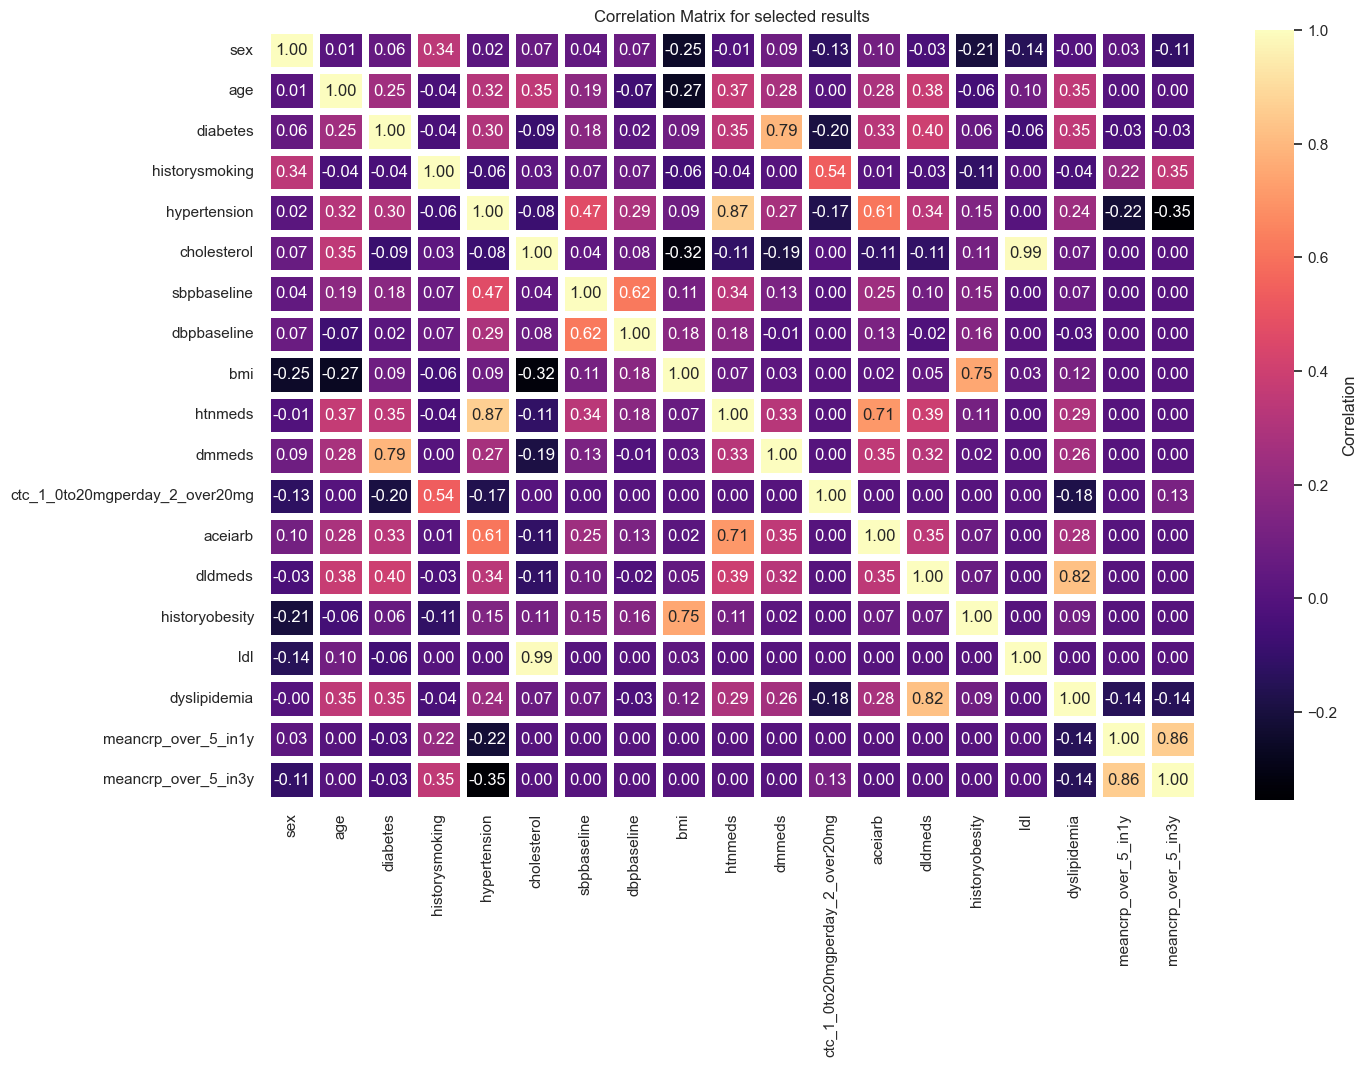

In [5]:
# Concatenate the three datasets vertically
merged_df = pd.concat([ckd_df, hepatitis_c_df, arterial_disease_ibd_df], ignore_index=True)

# Specify columns to include in the correlation matrix
selected_columns = ['sex', 'age', 'diabetes', 'historysmoking', 'hypertension', 'cholesterol', 'sbpbaseline', 'dbpbaseline', 'bmi', 'htnmeds', 'dmmeds', 'ctc_1_0to20mgperday_2_over20mg', 'aceiarb', 'dldmeds', 'historyobesity', 'ldl', 'dyslipidemia', 'meancrp_over_5_in1y', 'meancrp_over_5_in3y']

# Create a subset of the DataFrame with selected columns
subset_df = merged_df[selected_columns]

# Replace non-numeric values with NaN
subset_df = subset_df.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
correlation_matrix = subset_df.corr().fillna(0)

# Visualize the correlation matrix using a heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=5, cbar_kws={'label': 'Correlation'}, annot_kws={"size": 12})

# Adding title
plt.title('Correlation Matrix for selected results')

# Show the plot
plt.show()

the above correlation matrix only has those columns which have a high correlation between each and now we will identify how some health factors are contributing to other diseases


# Finding No.1 Diabetes relationship with kidney disease, hepatitis C and arterial disease

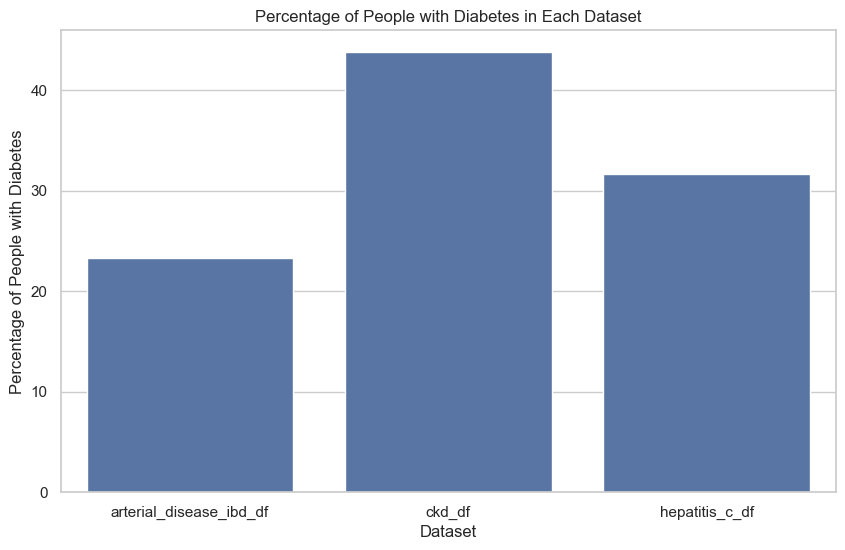

In [6]:
# Add a 'dataset' column to each DataFrame
ckd_df['dataset'] = 'ckd_df'
hepatitis_c_df['dataset'] = 'hepatitis_c_df'
arterial_disease_ibd_df['dataset'] = 'arterial_disease_ibd_df'

# Concatenate the datasets vertically
merged_df = pd.concat([ckd_df, hepatitis_c_df, arterial_disease_ibd_df])

# Calculate the percentage of people with diabetes in each dataset
percentage_diabetes = merged_df.groupby('dataset')['diabetes'].mean() * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_diabetes.index, y=percentage_diabetes.values)
plt.title('Percentage of People with Diabetes in Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Percentage of People with Diabetes')
plt.show()

The above chart shows that how many people who have these 3 diseases were also diabetic or have a risk of developing diabetes. In order to support these claims I am giving 3 research articles of 3 different experts who have worked on this field.

### Research article 1 (Diabetes with CKD):

Link: https://pubmed.ncbi.nlm.nih.gov/33198669/ <br>
Authors: Nazzal Z, Hamdan Z, Masri D, Abu-Kaf O, Hamad M.<br>
Title: Prevalence and risk factors of chronic kidney disease among Palestinian type 2 diabetic patients: a cross-sectional study. BMC Nephrol.<br>
Date: 2020 Nov 16;21(1):484.<br>
doi: 10.1186/s12882-020-02138-4.<br>
PMID: 33198669.<br>
PMCID: PMC7667814.

### Research article 2 (Diabetes with Hepatitis C):

Link: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0211193 <br>
Authors: Villar, Livia Melo AND Geloneze, Bruno AND Vasques, Ana Carolina Junqueira AND Pires, Maria Lucia Elias AND Miguel, Juliana Custódio AND da Silva, Elisangela Ferreira AND Marques, Vanessa Alves AND Scalioni, Leticia de Paula AND Lampe, Elisabeth, <br>
Title: Prevalence of hepatitis B and hepatitis C among diabetes mellitus type 2 individuals, <br>
Date: 2019 Feb, <br>
doi:{10.1371/journal.pone.0211193}, <br>
url: https://doi.org/10.1371/journal.pone.0211193. <br>

### Research article 3 (Diabetes with arterial disease):

Link: https://pubmed.ncbi.nlm.nih.gov/31394285/ <br>
Authros: Jess T, Jensen BW, Andersson M, Villumsen M, Allin KH. <br>
Title: Inflammatory Bowel Diseases Increase Risk of Type 2 Diabetes in a Nationwide Cohort Study. Clin Gastroenterol Hepatol. <br>
Date: 2020 Apr 18. <br>
doi: 10.1016/j.cgh.2019.07.052. Epub 2019 Aug 5. <br>
PMID: 31394285. <br>

# Finding No.2 Cholesterol effecting the LDL levels

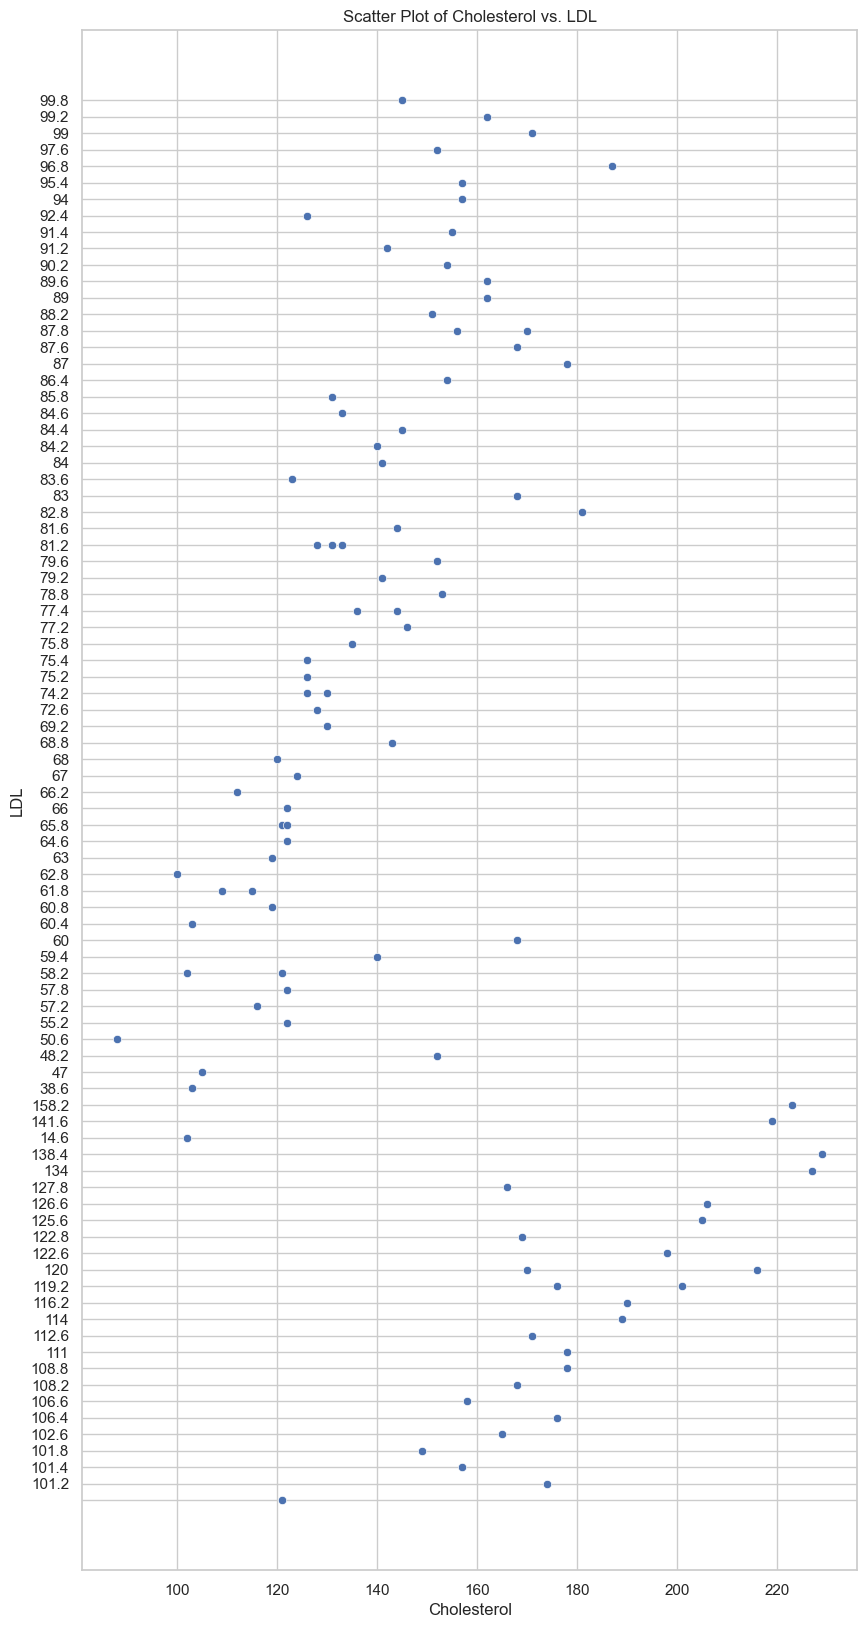

In [7]:
# Identify the lower and upper bounds for outliers using IQR
Q1 = hepatitis_c_df['cholesterol'].quantile(0.25)
Q3 = hepatitis_c_df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with Cholesterol values outside the bounds
df_no_outliers = hepatitis_c_df[(hepatitis_c_df['cholesterol'] >= lower_bound) & (hepatitis_c_df['cholesterol'] <= upper_bound)]

# Sort the DataFrame by 'LDL' with a more robust approach
df_sorted = df_no_outliers.sort_values(by='ldl', ascending=False)

# Scatter plot without outliers with 'LDL' values in descending order
plt.figure(figsize=(10, 20))
sns.scatterplot(x='cholesterol', y='ldl', data=df_sorted)
plt.title('Scatter Plot of Cholesterol vs. LDL')
plt.xlabel('Cholesterol')
plt.ylabel('LDL')
plt.show()


This scatter plot indicates that the people who have higher levels of cholesterol also had higher levels of LDL levels. In order to support this statement. I'm mentioning an article

Link: https://jhrlmc.com/index.php/home/article/view/117#:~:text=Conclusions%3A%20This%20study%20confirms%20a,more%20susceptible%20to%20cardiac%20diseases. <br>
Authors: Saeed, N., Raza, A., Ishaq Kiani, A., Moon, S., Khan, W., Arshad, S., Waseem, R., Ali Khan, M. and Sohail Ahmad, S. (2023), <br>
Title: Correlation of Total Cholesterol, LDL-C & HDL-C With Coronary Heart Disease Among Different Ethnic Groups in Northern Pakistan, <br>
Date: 2023, <br>

# Finding No.3 Effects of cholesterol in hepatitis C and chronic kidney disease

C:\Users\faraz\AppData\Local\Temp\ipykernel_33872\614147634.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts.values, palette='viridis')


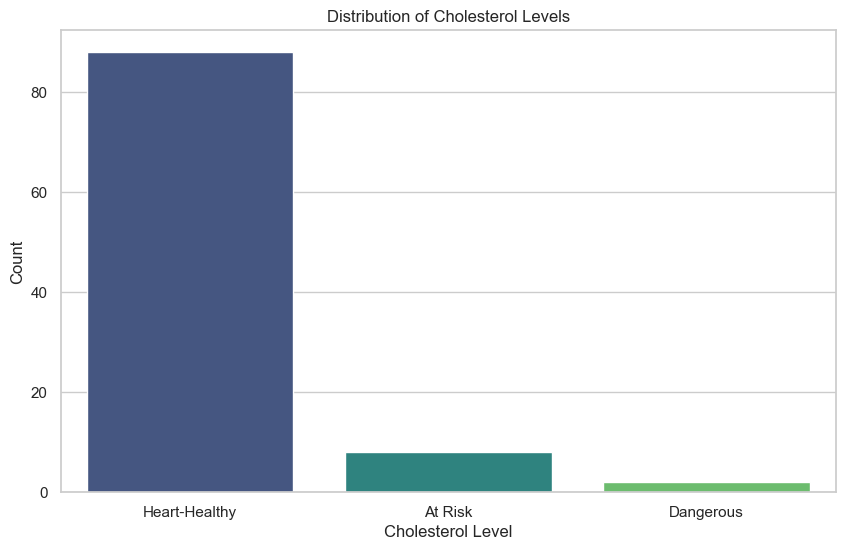

In [8]:
# Assuming df is your DataFrame containing the relevant columns

# Create a new column 'Cholesterol Level' based on total cholesterol values
hepatitis_c_df['Cholesterol Level'] = pd.cut(hepatitis_c_df['cholesterol'], bins=[-np.inf, 200, 239, np.inf],
                                 labels=['Heart-Healthy', 'At Risk', 'Dangerous'])

# Count the occurrences of each cholesterol level
cholesterol_counts = hepatitis_c_df['Cholesterol Level'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts.values, palette='viridis')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()


C:\Users\faraz\AppData\Local\Temp\ipykernel_33872\2694611489.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts.values, palette='viridis')


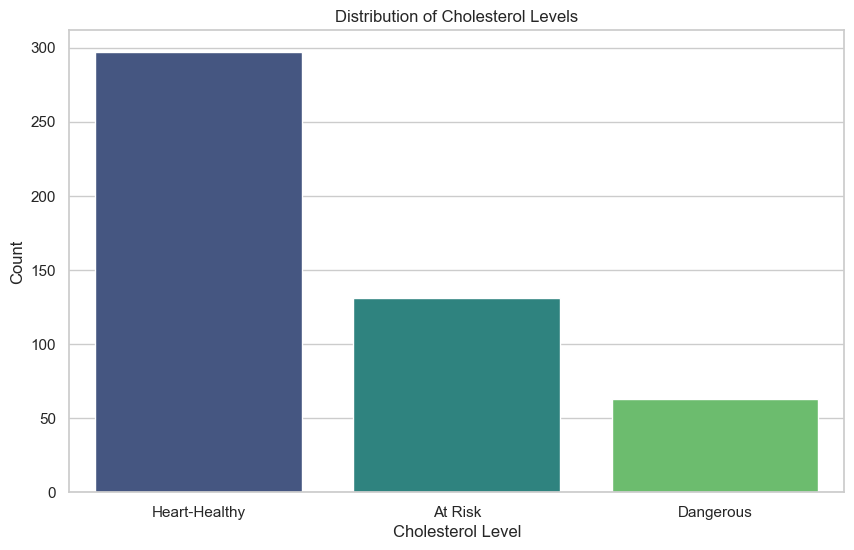

In [9]:
# Assuming df is your DataFrame containing the relevant columns

# Create a new column 'Cholesterol Level' based on total cholesterol values
ckd_df['Cholesterol Level'] = pd.cut(ckd_df['cholesterol'], bins=[-np.inf, 5.2, 6.2, np.inf],
                                 labels=['Heart-Healthy', 'At Risk', 'Dangerous'])

# Count the occurrences of each cholesterol level
cholesterol_counts = ckd_df['Cholesterol Level'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts.values, palette='viridis')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()


# Finding No.4 People with diabetes are also at the risk of having dyslipidemia

<Figure size 1000x600 with 0 Axes>

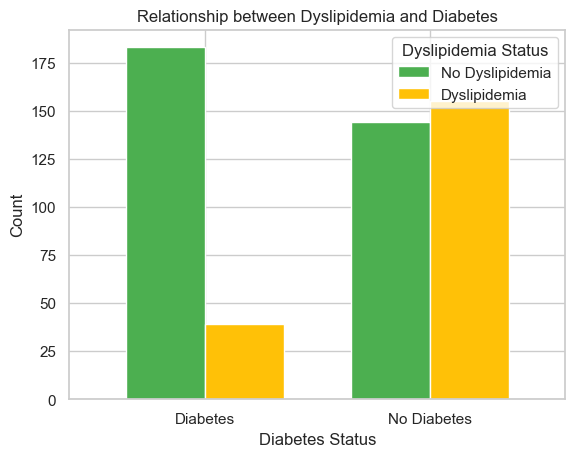

In [15]:
# Combine the datasets vertically
combined_df = pd.concat([arterial_disease_ibd_df, ckd_df], ignore_index=True)

# Create a new column 'Diabetes Status' based on diabetes values
combined_df['Diabetes Status'] = combined_df['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Create a new column 'Dyslipidemia Status' based on dyslipidemia values
combined_df['Dyslipidemia Status'] = combined_df['dyslipidemia'].map({0: 'No Dyslipidemia', 1: 'Dyslipidemia'})

# Count the occurrences of each combination of Dyslipidemia and Diabetes
cross_tab = pd.crosstab(combined_df['Dyslipidemia Status'], combined_df['Diabetes Status'])

# Bar chart
plt.figure(figsize=(10, 6))
cross_tab.T.plot(kind='bar', color=['#4CAF50', '#FFC107'], width=0.7)
plt.title('Relationship between Dyslipidemia and Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.legend(title='Dyslipidemia Status', loc='upper right', labels=['No Dyslipidemia', 'Dyslipidemia'])
plt.xticks(rotation=0)
plt.show()


The above graph shows that there is but not much association between dyslipidemia and diabetes but keeping in mind the limitations of my dataset. The articles which I found for this says otherwise. Dyslipidemia and diabetes are directly associated with each other. I'm referring the article below

Link: https://bmccardiovascdisord.biomedcentral.com/articles/10.1186/s12872-022-02489-w#Sec22
Author: Abdissa, D., Hirpa, D.
Title: Dyslipidemia and its associated factors among adult diabetes outpatients in West Shewa zone public hospitals,

# Conclusion

In unraveling the intricacies of diverse medical datasets, profound insights have surfaced, reshaping our understanding of the interplay between health parameters and diseases. A pivotal revelation emerges in the substantial association of diabetes with chronic kidney disease (CKD), hepatitis C, and arterial disease, underscoring the imperative for integrated healthcare strategies for individuals with diabetes. Additionally, the nuanced dynamics between cholesterol and low-density lipoprotein (LDL) levels offer targeted intervention possibilities, essential for managing cholesterol-related risks. The multifaceted effects of cholesterol in hepatitis C and CKD further accentuate the need for comprehensive interventions. Lastly, the heightened risk of dyslipidemia among individuals with diabetes underscores the interconnectedness of metabolic factors, urging a holistic health assessment. These succinct findings, distilled into key points, provide actionable insights for healthcare practitioners, steering the course toward more informed and targeted healthcare practices.